# 0. Install and Import dependencies

In [ ]:
%pip install tensorflow-gpu==2.8.0 tensorflow==2.8.0 stable-baselines gym-anytrading gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 55.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Fou

In [ ]:
import tensorflow.compat.v1 as tf
%pip install stable-baselines3[extra]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 19.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 43.8 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=569e1aecaed359d3c5f5db9117187b121af7dfca2ff6084c6ff8555ba5bd4fd6
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built 

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - The openAI library which can implement RL algorithms like DQN in situ
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN

# Misc libraries for plotting
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


# 1. Bringing in NIFTY50 Stock Data 

In [ ]:
df = pd.read_csv('6weekNIFTY.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,10-Jul-23,19400.35,19435.85,19327.10,19355.90,268246132.0,25991.55
1,11-Jul-23,19427.10,19515.10,19406.45,19439.40,251263638.0,26883.78
2,12-Jul-23,19497.45,19507.70,19361.75,19384.30,327941559.0,40163.14
3,13-Jul-23,19495.20,19567.00,19385.80,19413.75,310442517.0,27244.56
4,14-Jul-23,19493.45,19595.35,19433.50,19564.50,291165841.0,25484.44


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Shares Traded             float64
Turnover (₹ Cr)           float64
dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
Date,,,,,,
2023-07-10,19400.35,19435.85,19327.10,19355.90,268246132.0,25991.55
2023-07-11,19427.10,19515.10,19406.45,19439.40,251263638.0,26883.78
2023-07-12,19497.45,19507.70,19361.75,19384.30,327941559.0,40163.14
2023-07-13,19495.20,19567.00,19385.80,19413.75,310442517.0,27244.56
2023-07-14,19493.45,19595.35,19433.50,19564.50,291165841.0,25484.44


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(1,100), window_size=1)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (1, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.signal_features
#There are 2 signal features here, which is the actual NIFTY price and the difference of the price from the previous day.

array([[ 1.935590e+04,  0.000000e+00],
       [ 1.943940e+04,  8.350000e+01],
       [ 1.938430e+04, -5.510000e+01],
       [ 1.941375e+04,  2.945000e+01],
       [ 1.956450e+04,  1.507500e+02],
       [ 1.971145e+04,  1.469500e+02],
       [ 1.974925e+04,  3.780000e+01],
       [ 1.983315e+04,  8.390000e+01],
       [ 1.997915e+04,  1.460000e+02],
       [ 1.974500e+04, -2.341500e+02],
       [ 1.967235e+04, -7.265000e+01],
       [ 1.968060e+04,  8.250000e+00],
       [ 1.977830e+04,  9.770000e+01],
       [ 1.965990e+04, -1.184000e+02],
       [ 1.964605e+04, -1.385000e+01],
       [ 1.975380e+04,  1.077500e+02],
       [ 1.973355e+04, -2.025000e+01],
       [ 1.952655e+04, -2.070000e+02],
       [ 1.938165e+04, -1.449000e+02],
       [ 1.951700e+04,  1.353500e+02],
       [ 1.959730e+04,  8.030000e+01],
       [ 1.957085e+04, -2.645000e+01],
       [ 1.963255e+04,  6.170000e+01],
       [ 1.954310e+04, -8.945000e+01],
       [ 1.942830e+04, -1.148000e+02],
       [ 1.943455e+04,  6

# 2. Build Environment

In [ ]:
env.action_space #there are only 2 actions in this gym environment - buy and sell

Discrete(2)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the envir

info {'total_reward': 257.40000000000146, 'total_profit': 0.8847193916035666, 'position': 0}


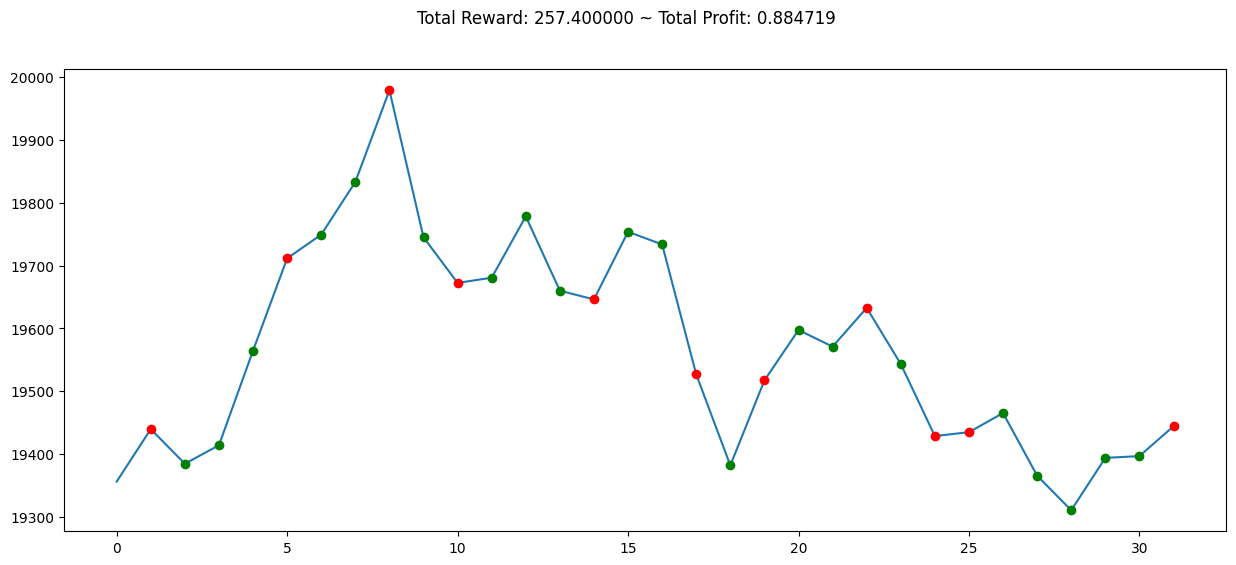

In [ ]:
state = env.reset()
while True:
    action = env.action_space.sample() #random actions (buy and sell) that we would perform
    n_state, reward, done, info = env.step(action) #By performing that action on the environment, we get a new step and reward due to the trading
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all() #render all the trades in the environment
plt.show() #the red dots show a short sell so basically a bad sell and green is a late sell so basically the moneymaking sells

# 3. Build Environment and Train

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(2,100), window_size=2)
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 2)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=500000)

Streaming output truncated to the last 5000 lines.
|    fps              | 819      |
|    time_elapsed     | 555      |
|    total_timesteps  | 455416   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 51.4     |
|    n_updates        | 101353   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15708    |
|    fps              | 819      |
|    time_elapsed     | 555      |
|    total_timesteps  | 455532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 48.8     |
|    n_updates        | 101382   |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 15712    |
|    fps              | 819      |
|   

# 4. Evaluation

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(2,32), window_size=2)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 228.54999999999927, 'total_profit': 0.8969098071682676, 'position': 1}


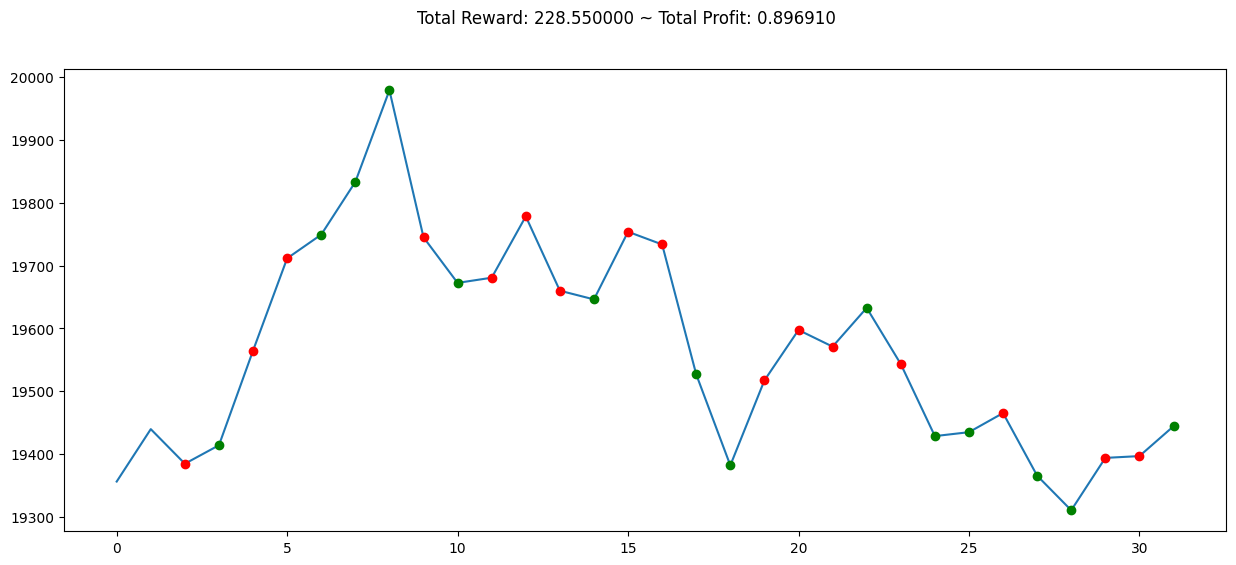

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()